<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/Keras_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.1.0'

In [0]:
######################################
## FILES UPLOAD

In [0]:
uploaded = files.upload() ## RUN

Saving lending_club_info.csv to lending_club_info.csv


In [0]:
data_info = pd.read_csv(io.StringIO(uploaded['lending_club_info.csv'].decode('utf-8')),index_col='LoanStatNew') ### RUN

In [0]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description']) ## RUN

In [0]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [0]:
from google.colab import files ## RUN
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['lending_club_loan_two.csv'].decode('utf-8'))) ## RUN

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [0]:
# EDA

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [0]:
df['loan_status'].value_counts(1)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

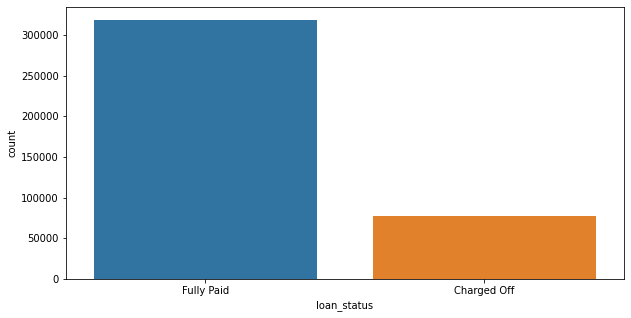

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan_status',data=df)
plt.show()

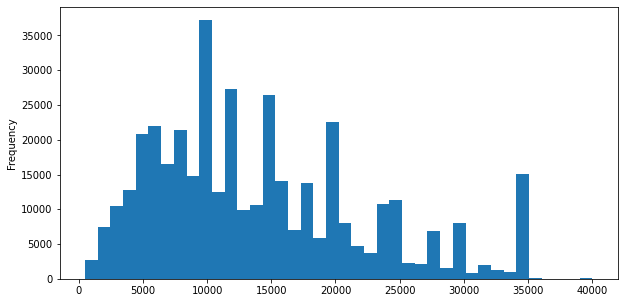

In [0]:
plt.figure(figsize=(10,5))
df['loan_amnt'].plot(kind = 'hist',bins = 40)
plt.show()

In [0]:
# What are the numerical continuous variables

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [0]:
feat_info('mort_acc')

Number of mortgage accounts.


In [0]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [0]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


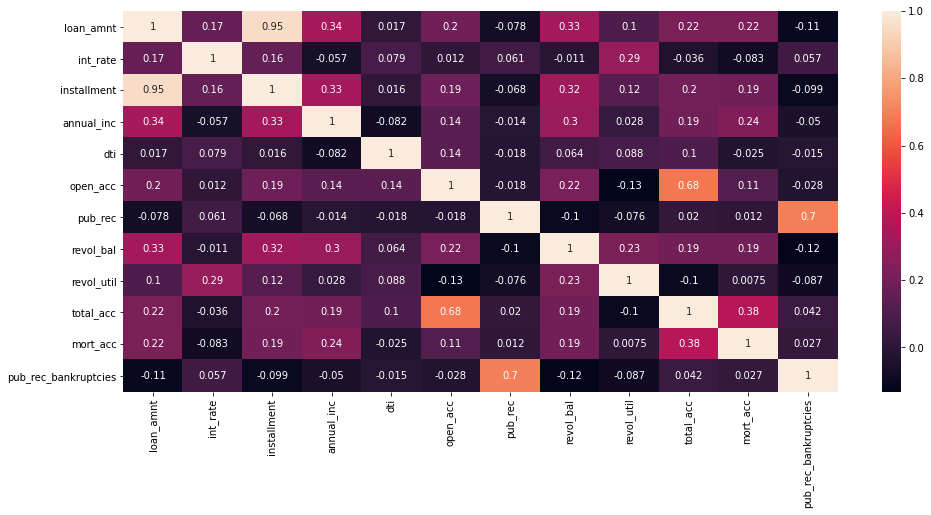

In [0]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [0]:
## We check the most highly correlated pair of categories

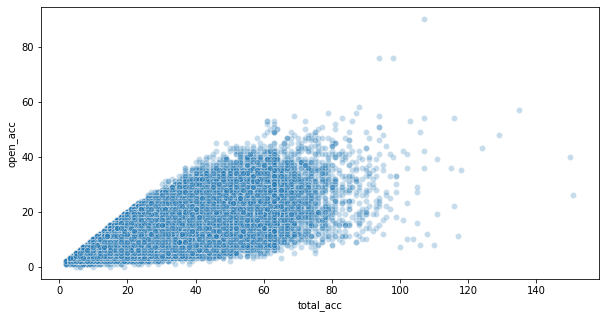

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'total_acc',y='open_acc',data=df,alpha=0.25)
plt.show()

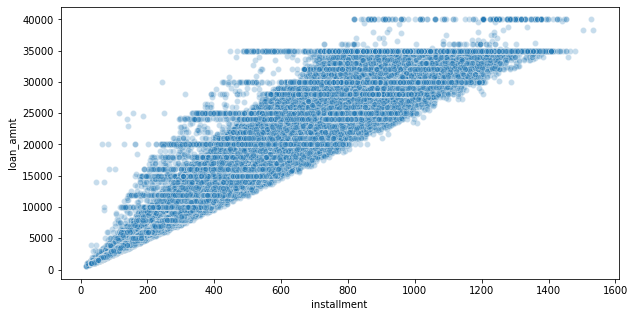

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'installment',y='loan_amnt',data=df,alpha=0.25)
plt.show()

In [0]:
## Focus now on the most important categories: loan amount and loan status

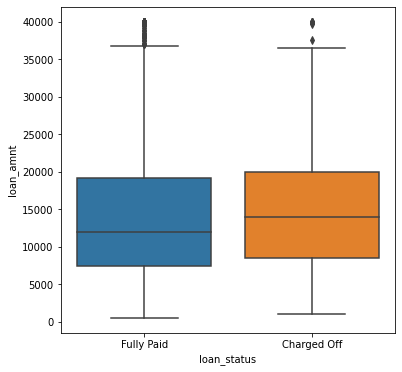

In [0]:
plt.figure(figsize=(6,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.show()

In [0]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [0]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

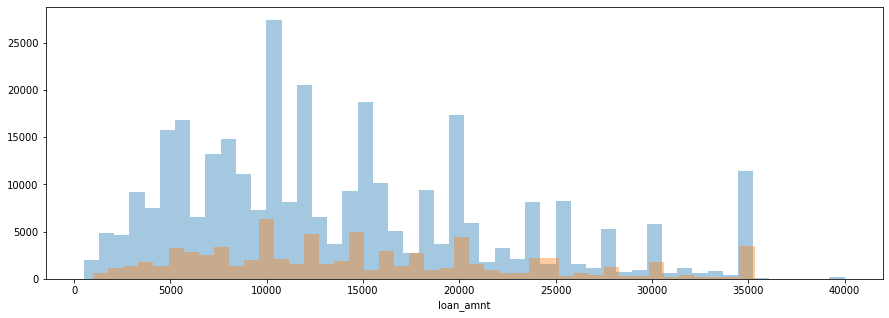

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(df['loan_amnt'][df['loan_status']=='Fully Paid'],kde=False)
sns.distplot(df['loan_amnt'][df['loan_status']=='Charged Off'],kde=False)
plt.show()

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [0]:
## Explore GRADE and SUBGRADE categories

In [0]:
sorted(list(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [0]:
df['sub_grade'].unique().sort()

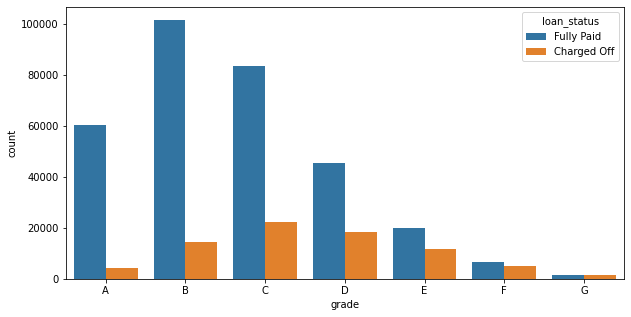

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade',data=df,hue='loan_status',order=sorted(list(df['grade'].unique())))
plt.show()

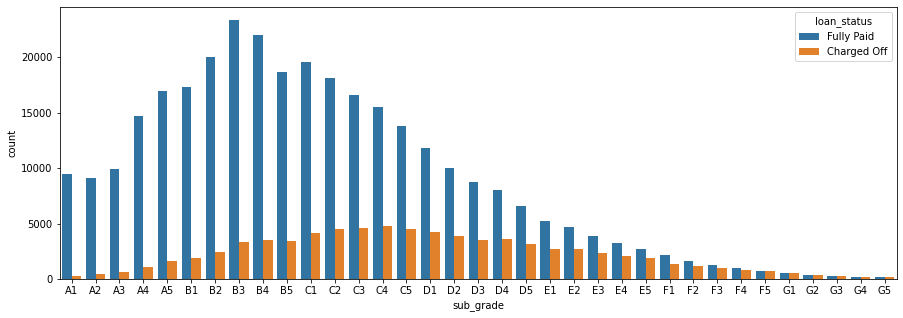

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=df,order=sorted(list(df['sub_grade'].unique())),hue='loan_status')
plt.show()

In [0]:
df2= df[(df['grade']=='F') | (df['grade']=='G')]

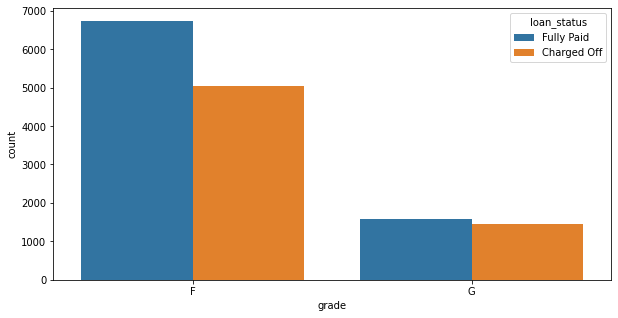

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade',data=df2,hue='loan_status',order=sorted(list(df2['grade'].unique())))
plt.show()

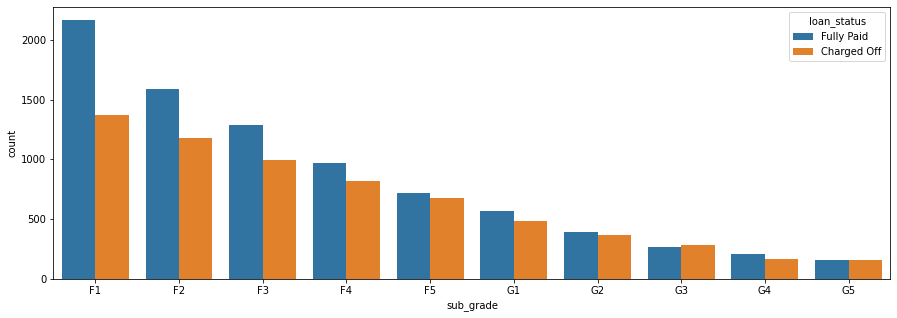

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=df2,order=sorted(list(df2['sub_grade'].unique())),hue='loan_status')
plt.show()

In [0]:
# We turn our y column from categorical to numerical

In [0]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0) ## RUN

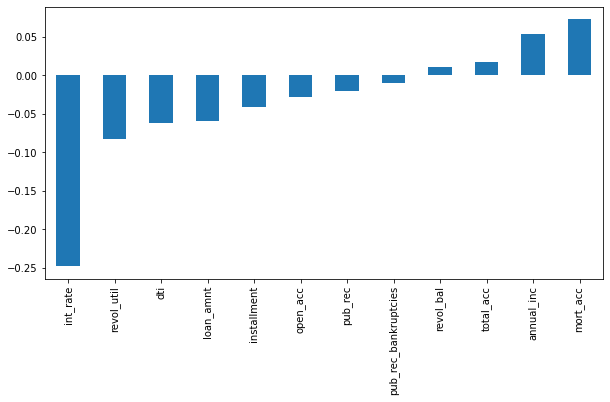

In [0]:
plt.figure(figsize=(10,5))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')
plt.show()

In [0]:
# DATA PREPROCESSING

In [0]:
len(df)

396030

In [0]:
df.isna().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [0]:
feat_info('emp_title')
feat_info('emp_length')


The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [0]:
df['emp_title'].nunique()

173105

In [0]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Kabbalah Center                  1
city of springfield              1
Afl provider/ hab-tech           1
CHS Mercy Hospital               1
Depart of veterans affairs       1
Name: emp_title, Length: 173105, dtype: int64

In [0]:
df.drop('emp_title',axis=1,inplace=True) #### RUN

In [0]:
###

In [0]:
list(df['emp_length'].unique())

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year',
 nan]

In [0]:
list_sort = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [0]:
list_sort

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [0]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

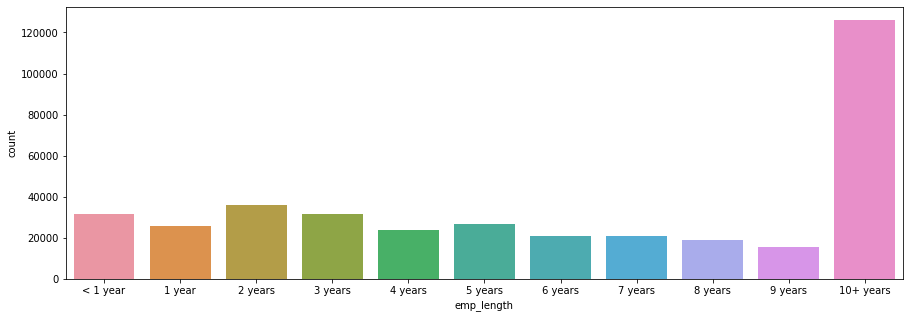

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=df,order=list_sort)
plt.show()

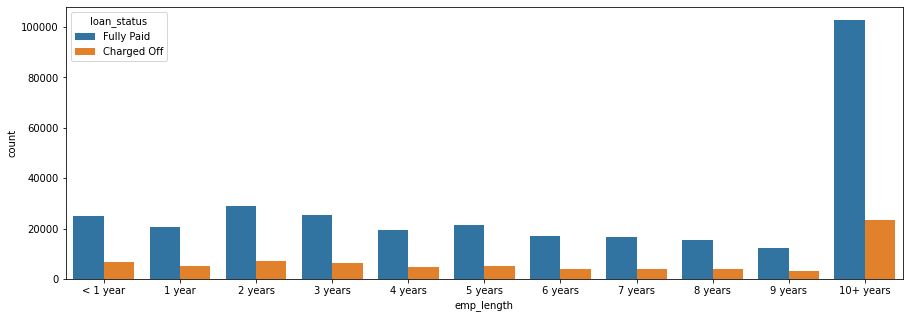

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length',data=df,order=list_sort,hue='loan_status')
plt.show()

In [0]:
df[df['loan_status']=='Charged Off']['emp_length'].value_counts(1)

10+ years    0.319612
2 years      0.095326
< 1 year     0.090356
3 years      0.085110
1 year       0.070958
5 years      0.070104
4 years      0.063440
7 years      0.055827
6 years      0.054285
8 years      0.052716
9 years      0.042266
Name: emp_length, dtype: float64

In [0]:
df.drop('emp_length',axis=1,inplace=True) ### RUN

In [0]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [0]:
df[['purpose','title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [0]:
df.drop('title',axis=1,inplace=True) ### RUN

In [0]:
#####
feat_info('mort_acc')

Number of mortgage accounts.


In [0]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [0]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [0]:
df['mort_acc'].mode()

0    0.0
dtype: float64

In [0]:
df.corr()['mort_acc'].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

In [0]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [0]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [0]:
mort_acc_mean = df.groupby('total_acc')['mort_acc'].mean() ### RUN

In [0]:
mort_acc_mean[135.0]

3.0

In [0]:
np.isnan(df['mort_acc'].iloc[396029])

True

In [0]:
def fill_mort_acc(mort_acc,total_acc):
  
  if np.isnan(mort_acc):

    return mort_acc_mean[total_acc]

  else:
    return mort_acc

    ### RUN

In [0]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']),axis=1) ### RUN

In [0]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [0]:
df.dropna(inplace=True) ### RUN

In [0]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [0]:
######## CATEGORICAL VARIABLES

In [0]:
df.select_dtypes('object').columns 

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [0]:
df['term'][0]

' 36 months'

In [0]:
int(df['term'][2].split(' ')[1])

36

In [0]:
df['term'] = df['term'].apply(lambda x: int(x.split(' ')[1])) ### RUN

In [0]:
df.drop('grade',axis=1,inplace=True) ### RUN

In [0]:
pd.get_dummies(df['sub_grade'],drop_first=True).head() 

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True) ### RUN

In [0]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1) ### RUN

In [0]:
df 

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [0]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [0]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [0]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [0]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [0]:
pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True) ### RUN

In [0]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1) ### RUN

In [0]:
df.select_dtypes('object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [0]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER') ### RUN

In [0]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True) ### RUN

In [0]:
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1) ### RUN

In [0]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [0]:
df['address'][0][-5:]

'22690'

In [0]:
df['address'][0].split(' ')[-1:][0]

'22690'

In [0]:
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1:][0]) ### RUN

In [0]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [0]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True) ### RUN
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [0]:
df.drop('address',axis=1,inplace=True) ### RUN

In [0]:
df.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [0]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [0]:
df.drop('issue_d',axis=1,inplace=True) ### RUN

In [0]:
df.select_dtypes('object').columns 

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [0]:
df['earliest_cr_line'].value_counts() 

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Feb-1957       1
Jul-1959       1
Jan-1957       1
Jan-1944       1
Feb-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [0]:
date_line = df['earliest_cr_line'].iloc[0] ## RUN

In [0]:
int(date_line.split('-')[1])

1990

In [0]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date_line:int(date_line.split('-')[1]))
df.drop('earliest_cr_line',axis=1,inplace=True) ## RUN

In [0]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT', '05113', '11650',
       '22690', '29597', '30723', '48052', '70466', '86630', '93700',
       'earliest_cr_year'],
      dtype='object')

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '226

In [0]:
################################

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df.drop('loan_status',axis=1, inplace=True)

In [0]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [0]:
model = Sequential()

In [0]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:
model.fit(x = X_train,y = y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2984 - val_loss: 0.2647
Epoch 2/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2649 - val_loss: 0.2631
Epoch 3/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2625 - val_loss: 0.2626
Epoch 4/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2614 - val_loss: 0.2637
Epoch 5/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2608 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2601 - val_loss: 0.2619
Epoch 7/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2599 - val_loss: 0.2620
Epoch 8/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2594 - val_loss: 0.2620
Epoch 9/25
316175/316175 [==============================] - 4s 13us/sample - 

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('first_shot.h5')

In [0]:
losses = pd.DataFrame(model.history.history)

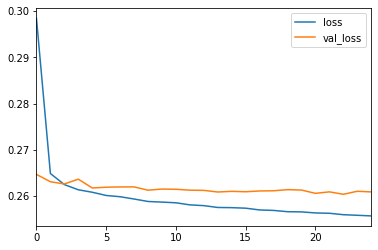

In [0]:
losses.plot()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [0]:
print(confusion_matrix(y_test,predictions))

[[ 6913  8745]
 [  154 63232]]


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [0]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:
model.fit(x = X_train,y = y_train,epochs=50,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2557 - val_loss: 0.2611
Epoch 2/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2555 - val_loss: 0.2605
Epoch 3/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2552 - val_loss: 0.2608
Epoch 4/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2553 - val_loss: 0.2610
Epoch 5/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2552 - val_loss: 0.2608
Epoch 6/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2548 - val_loss: 0.2611
Epoch 7/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2548 - val_loss: 0.2607
Epoch 8/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2548 - val_loss: 0.2610
Epoch 9/50
316175/316175 [==============================] - 4s 13us/sample - 

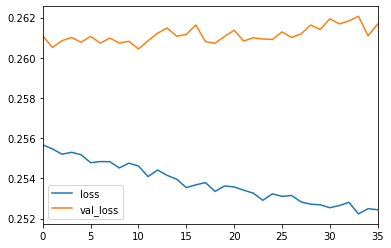

In [0]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [0]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6976  8682]
 [  223 63163]]


In [0]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:
model.fit(x = X_train,y = y_train,epochs=25,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 33s 106us/sample - loss: 0.2807 - val_loss: 0.2648
Epoch 2/25
316175/316175 [==============================] - 33s 103us/sample - loss: 0.2645 - val_loss: 0.2635
Epoch 3/25
316175/316175 [==============================] - 32s 103us/sample - loss: 0.2633 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 33s 103us/sample - loss: 0.2627 - val_loss: 0.2634
Epoch 5/25
316175/316175 [==============================] - 32s 103us/sample - loss: 0.2628 - val_loss: 0.2625
Epoch 6/25
316175/316175 [==============================] - 32s 102us/sample - loss: 0.2623 - val_loss: 0.2630
Epoch 7/25
316175/316175 [==============================] - 32s 103us/sample - loss: 0.2620 - val_loss: 0.2628
Epoch 8/25
316175/316175 [==============================] - 32s 103us/sample - loss: 0.2618 - val_loss: 0.2624
Epoch 9/25
316175/316175 [==============================] - 3

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6752  8906]
 [   18 63368]]


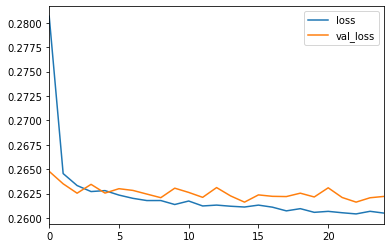

In [0]:
losses = pd.DataFrame(model.history.history)
predictions = model.predict_classes(X_test)
losses.plot()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [0]:
# early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [0]:
X.shape

(395219, 78)

In [0]:
395219*0.1

39521.9

In [0]:
78/2

39.0

In [0]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [0]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [0]:
model.fit(x = X_train,y = y_train,epochs=25,validation_data=(X_test,y_test),callbacks=[early_stop])

In [0]:
losses = pd.DataFrame(model.history.history)
predictions = model.predict_classes(X_test)
losses.plot()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))